# Mohs Hardness
<b>Objective:</b><br>
To develop a machine learning approach for predicting the Mohs hardness of naturally occurring minerals based on atomic and electronic features derived from composition, enabling non-destructive and efficient hardness testing.


<b>Citation</b><br>
Walter Reade, Ashley Chow. (2023). Regression with a Mohs Hardness Dataset. Kaggle. https://kaggle.com/competitions/playground-series-s3e25

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import warnings
warnings.filterwarnings("ignore")

In [10]:
df_test=pd.read_csv("./data/Mohs_Hardness_test.csv")
df_train = pd.read_csv("./data/Mohs_Hardness_train.csv")
df_test.drop('id',axis=1,inplace=True)
df_train.drop('id',axis=1,inplace=True)

In [11]:
df_train.head().T

,0,1,2,3,4
allelectrons_Total,100.000000,100.000000,76.000000,100.000000,116.000000
density_Total,0.841611,7.558488,8.885992,8.795296,9.577996
allelectrons_Average,10.000000,10.000000,15.600000,10.000000,11.600000
val_e_Average,4.800000,4.800000,5.600000,4.800000,4.800000
atomicweight_Average,20.612526,20.298893,33.739258,20.213349,24.988133
ionenergy_Average,11.088100,12.040830,12.086300,10.948500,11.824480
el_neg_chi_Average,2.766000,2.755000,2.828000,2.648000,2.766000
R_vdw_element_Average,1.732000,1.631000,1.788000,1.626000,1.682000
R_cov_element_Average,0.860000,0.910000,0.864000,0.936000,0.896000
zaratio_Average,0.496070,0.492719,0.481478,0.489272,0.492736


In [15]:
df_train.dtypes

allelectrons_Total       float64
density_Total            float64
allelectrons_Average     float64
val_e_Average            float64
atomicweight_Average     float64
ionenergy_Average        float64
el_neg_chi_Average       float64
R_vdw_element_Average    float64
R_cov_element_Average    float64
zaratio_Average          float64
density_Average          float64
Hardness                 float64
dtype: object

In [13]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
allelectrons_Total,10407.0,128.053516,224.123776,0.0,68.000000,100.000000,131.000000,15300.000000
density_Total,10407.0,14.491342,15.972877,0.0,7.558488,10.650000,16.676996,643.093804
allelectrons_Average,10407.0,17.033222,10.468734,0.0,10.000000,12.600000,22.000000,67.000000
val_e_Average,10407.0,4.546789,0.690864,0.0,4.000000,4.714286,4.800000,6.000000
atomicweight_Average,10407.0,37.507703,26.012313,0.0,20.298893,26.203827,48.719500,167.400000
ionenergy_Average,10407.0,10.938308,1.408276,0.0,10.590660,11.202760,11.670725,15.245810
el_neg_chi_Average,10407.0,2.607662,0.334906,0.0,2.530000,2.706000,2.805000,3.443000
R_vdw_element_Average,10407.0,1.731330,0.192481,0.0,1.672500,1.732727,1.800000,2.250000
R_cov_element_Average,10407.0,0.944132,0.180017,0.0,0.864000,0.915556,0.981667,1.615840
zaratio_Average,10407.0,0.493349,0.063080,0.0,0.476196,0.488550,0.496070,0.825990


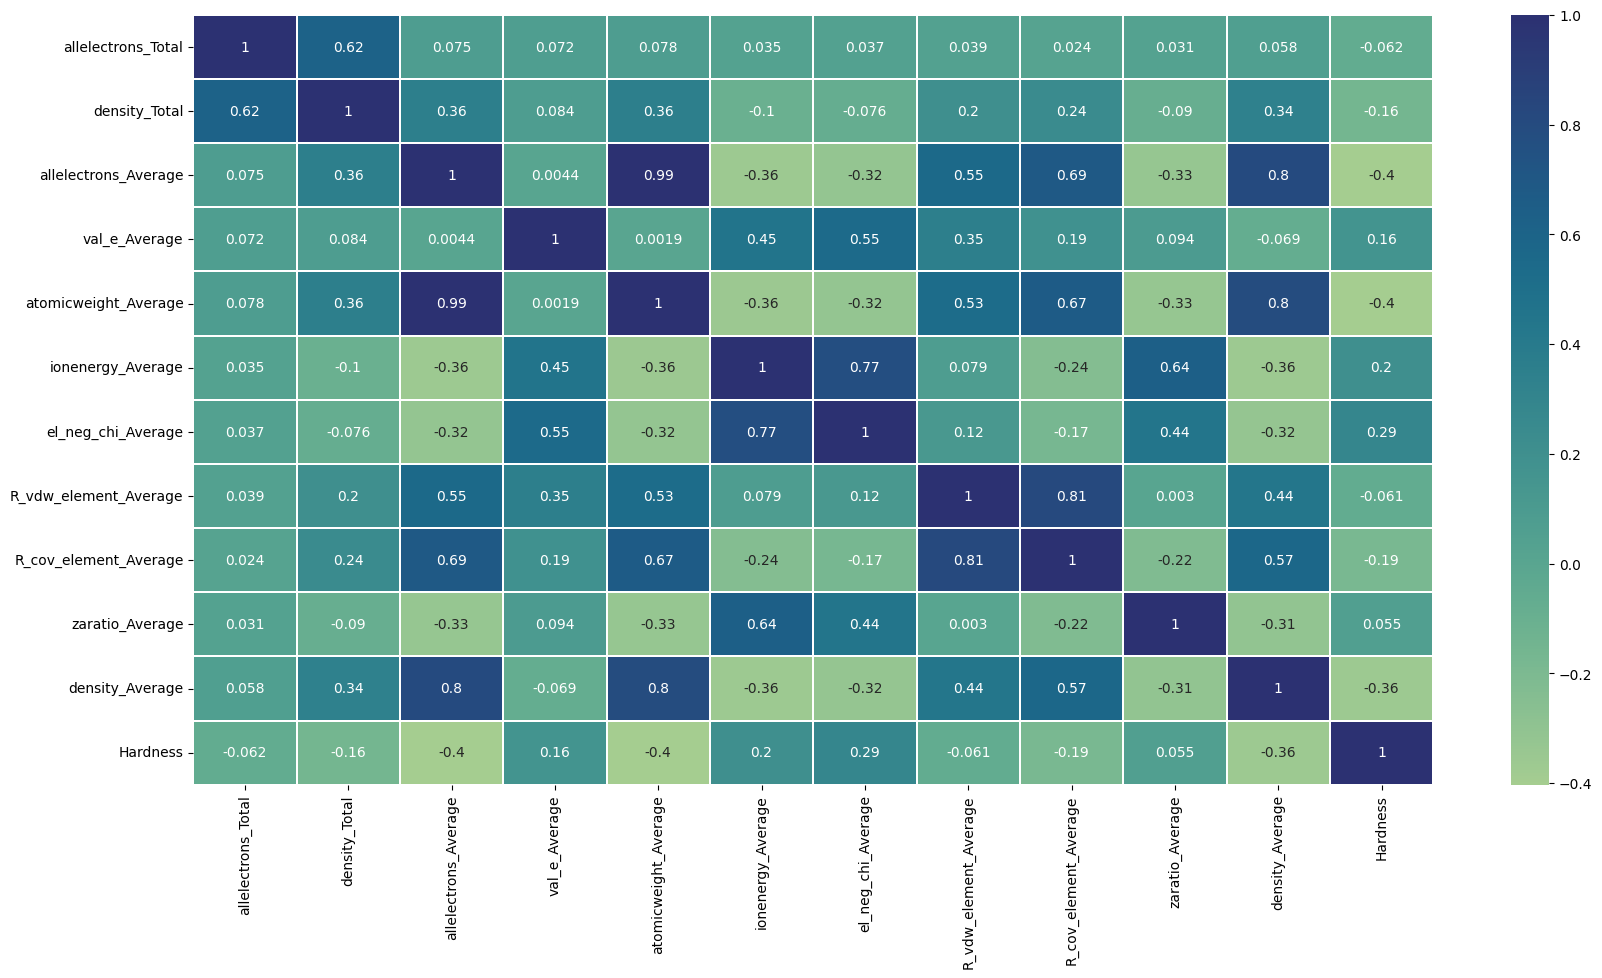

In [32]:
plt.figure(figsize=(20,10))
sns.heatmap(df_train.corr(),annot=True,fmt='.2g',linewidths=.025,cmap="crest")
plt.show()

In [44]:
corr_df=df_train.corr()
mask=abs(corr_df)>0.80

In [48]:
df_train.columns.to_list()

['allelectrons_Total',
 'density_Total',
 'allelectrons_Average',
 'val_e_Average',
 'atomicweight_Average',
 'ionenergy_Average',
 'el_neg_chi_Average',
 'R_vdw_element_Average',
 'R_cov_element_Average',
 'zaratio_Average',
 'density_Average',
 'Hardness']

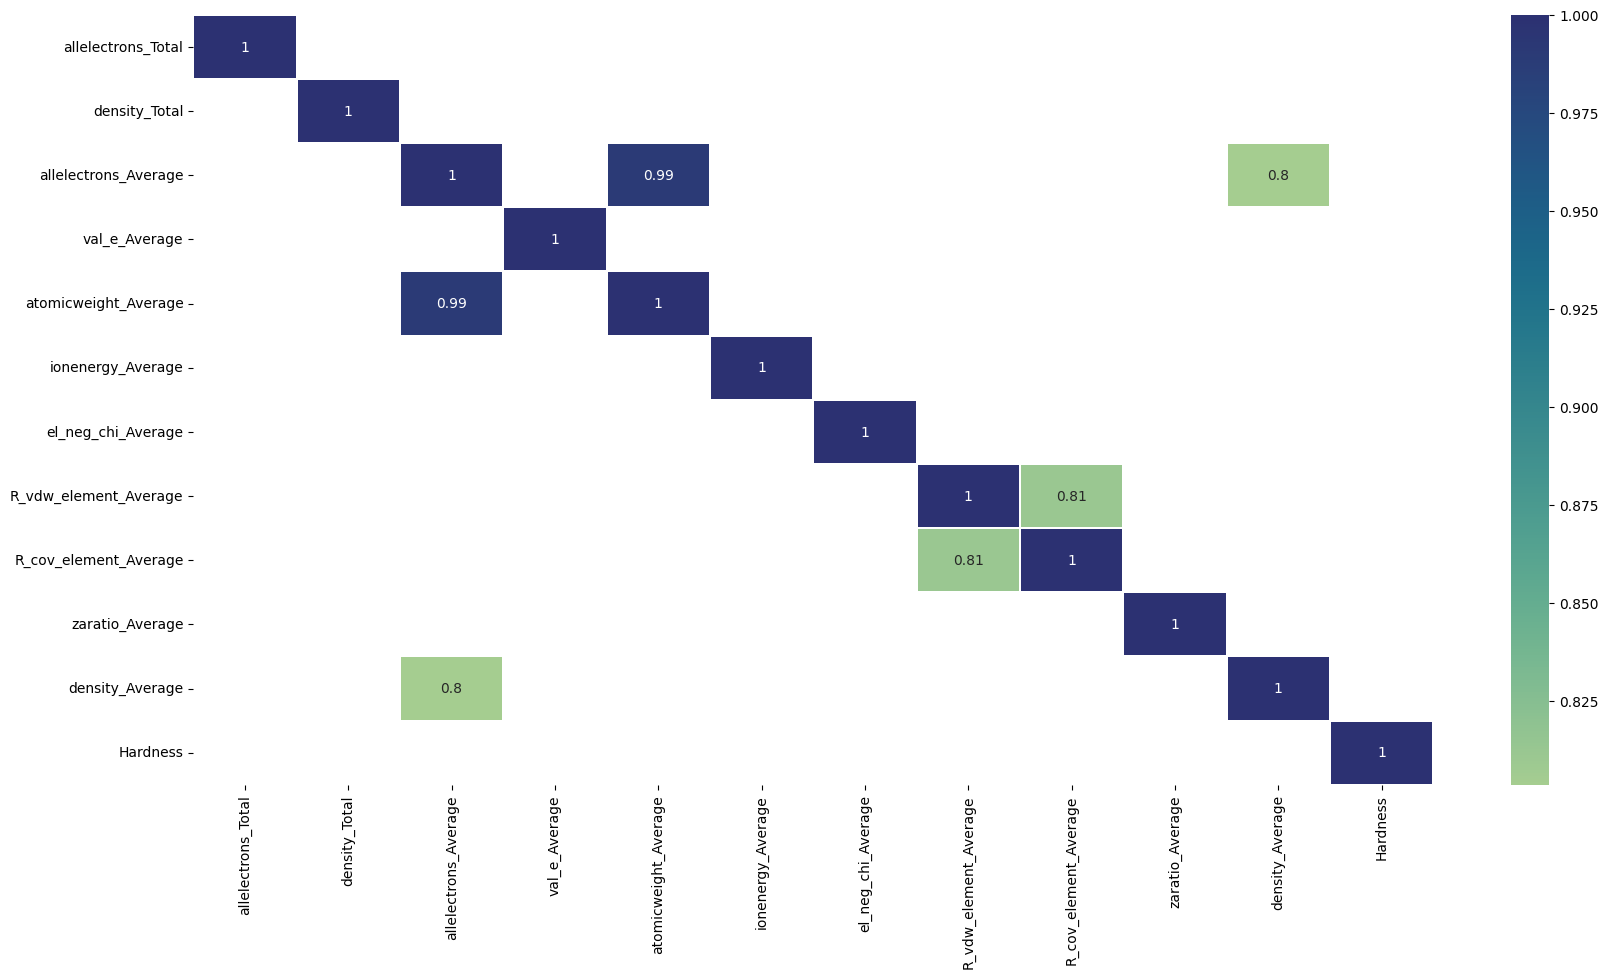

In [45]:
plt.figure(figsize=(20,10))
corr_df=df_train.corr()
sns.heatmap(corr_df[mask],annot=True,fmt='.2g',linewidths=.025,cmap="crest")
plt.show()